# Line fitting as a linear inverse problem

Assume we have a number of observation points $d_i$ and we expect a linear function that may explain the data. What does that mean? The linear function we seek is 

$f(x) = a + b x $

and the unknowns are the coefficients a and b. We pose that in the language of linear inverse problems. We can define a physical problem that corresponds to this situation. Let us assume we observe the sound of an explosion at a number of microphones that have various distances $x_i$. For each of this distance we observe an arrival time $t_i$. We assume that the arrival time is $t(x) = s * x + t_0$ where s is the slowness (inverse velocity) and t_0 is the origin time. It is the slowness and $t_0$ that we would like to estimate. 

Thus we would have

$
t_1 = s * x_1 + t_0

t_2 = s * x_2 + t_0

t_3 = s * x_3 + t_0

.
.
.

t_n = s * x_n + t_0
$

Let us cast that in our inverse problem terminology

$ d = G m $

In this case m is our model vector with unknwons a and b thus $m = [s , t_0]$ and $d_n = t_n$. The observations are in our data vector d. The forward operator G connects thedata space and the model space, thus 

$ G = [x_1, 1; x_2, 1 .... x_n, 1]$

and the solution is

$m = [G^T G]^{-1}G d$

Let us write code that puts this into action!
  


In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

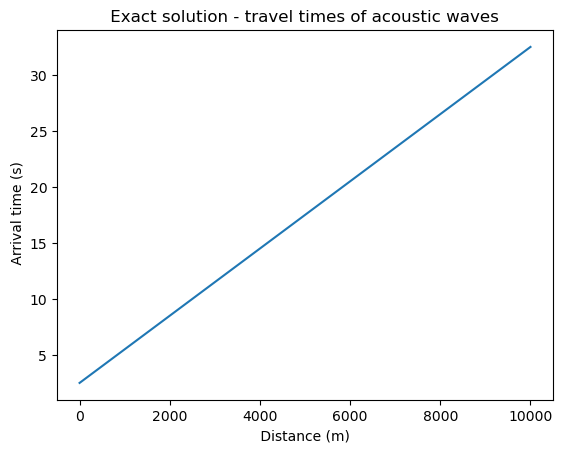

In [2]:
# Let us set up the problem with the true solution, we observe up to 10 km

x_true = np.linspace(0,10000,100)
s_true = 1/333.    # acoustic slowness
t0_true = 2.5

t_true = x_true*s_true +t0_true

# Let s plot it
plt.plot(x_true,t_true)
plt.xlabel(' Distance (m) ')
plt.ylabel(' Arrival time (s)')
plt.title(' Exact solution - travel times of acoustic waves ')
plt.show()


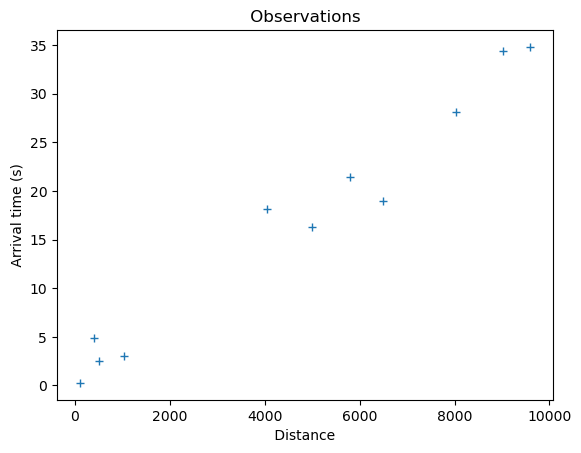

In [3]:
# Now let us solve a data fitting problem

# We observe at the following distances
n = 11
x = np.zeros(n)
x = [100., 510, 410, 1045, 4050, 5000, 5800, 6500, 8040,9030, 9600]
x = np.array(x)
n = np.size(x)
t = np.zeros(n)
err = 5 # max error

# Let us generate observations with some errors
for i in range(n):
    t[i] = x[i] * s_true + t0_true + 2*(np.random.rand()-.5)*err

# outlier
#t[5] += 50
#t[10] += 50


# Let us plot the observational data

plt.plot(x,t,'+')
plt.xlabel(' Distance ')
plt.ylabel(' Arrival time (s) ')
plt.title(' Observations ')
plt.show()


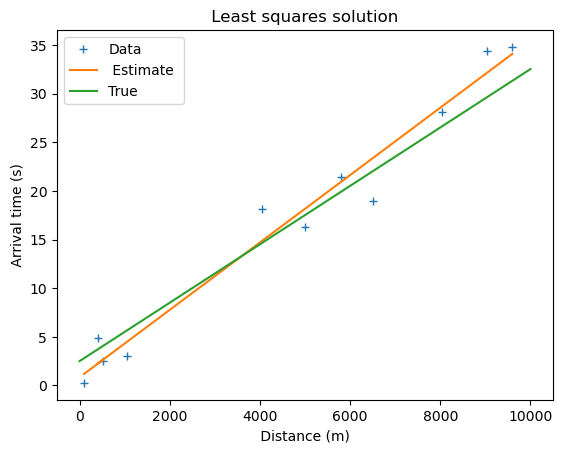

In [4]:
# Let us map it into our inverse problem d = G m and solve it!

d = t             # easy, that s our data
m = np.zeros(2)   # our unknown model vector
G = np.zeros([2,n]) # the forward operator

for i in range(n):
    G[0,i] = x[i]
    G[1,i] = 1.

G = G.transpose()

# We are ready to solve the inverse problem

m = np.linalg.inv(G.transpose()@G)@G.transpose()@d

# Plot the result
plt.plot(x,t,'+')
plt.plot(x,m[0]*x+m[1])
plt.plot(x_true,t_true)   
plt.xlabel(' Distance (m) ')
plt.ylabel(' Arrival time (s) ')
plt.legend(['Data', ' Estimate ', 'True '])
plt.title(' Least squares solution ')
plt.savefig('line.png')




# Let us add the concept of errors using COVARIANCE

We describe the data errors with the covariance matrix C and its inverse $C^{-1}$. Please check the lecture notes of Andreas Fichtner for details. 

Then the solution to the linear inverse problem is given by

$m = [G^T C^{-1} G]^{-1}G C^{-1} d$

Make sure you understand the meaning of the diagonal elements of the covariance matrix. In terms of data errors it can be considered the variance of a Gaussiaan function describing the measurement uncertainties. 


**Exercise:**

* Modify the problem above (maybe with fewer data points) and add a clear outlier
* Estimate the line and compare with the true solution
* Now change C such that the outlier has much higher uncertainty
* Observe the difference of the resulting solution
* Discuss the results



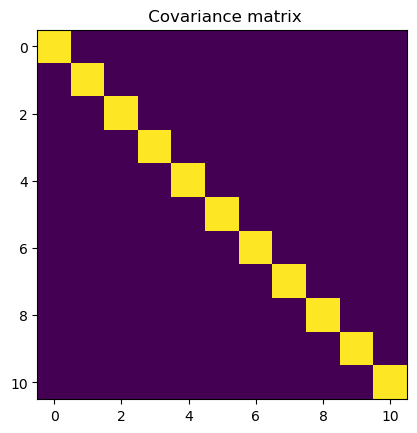

In [5]:
# Iniutialize the inverse covariance
Cinv=np.identity(n)*5

# Let s plot the Covariance Matrix

plt.imshow(Cinv)
plt.title(' Covariance matrix')
plt.show()





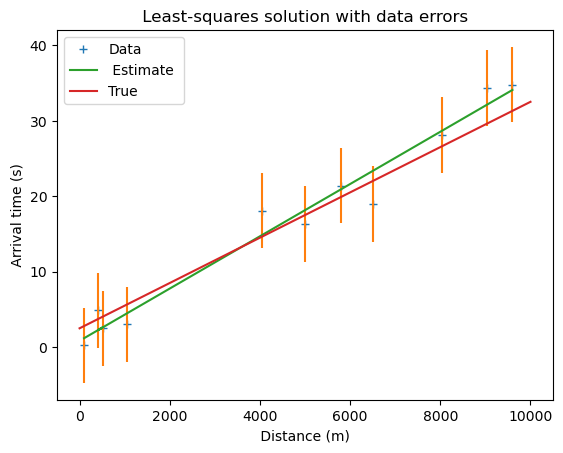

In [6]:

# Now we can solve the data fitting problem including a formal treatment of errors in the data

m = np.linalg.inv(G.transpose()@Cinv@G)@G.transpose()@Cinv@d

# Plot the results with errorbars on the data
plt.plot(x,t,'+')
plt.errorbar(x, t,yerr=Cinv.diagonal(),ls = "none")
plt.plot(x,m[0]*x+m[1])
plt.plot(x_true,t_true)   
plt.xlabel(' Distance (m) ')
plt.ylabel(' Arrival time (s) ')
plt.legend(['Data', ' Estimate ', 'True '])
plt.title(' Least-squares solution with data errors ')
plt.savefig('line.png')
